## Data analysis of Strathclyde Refit Data

### Set Up

### Import Required Libraries

In [1]:
#conda install matplotlib --force # Reinstall matplotlib in case of running errors

%matplotlib inline
#from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
import pandas as pd
import seaborn as sns
import os
import time
import numpy as np

## Data processing

### This loads the data, resamples it to half hour intervals and saves the new data files.

In [3]:
mydir = os.chdir('/Users/cvyb\OneDrive - Loughborough University/ERBE_YB/Energy Analysis/Course Work/CLEAN_REFIT_081116')

In [5]:
myFile = os.listdir(mydir)

myFile[0:2]
myFile2 = os.path.splitext(myFile[1])[0].rsplit('_', 1)[1]
#myFile2.rsplit('_', 1)[1]
myFile2

#testName = os.path.splitext(myFile)[0]#.rsplit('_', 1)[1]

'House10'

In [6]:
#for fileName in os.listdir(mydir):
    #splitFileName = os.path.splitext(fileName)[0].rsplit('_', 1)[1]
    #addFileName = os.path.join(fp,filename)
    #print(splitFileName)

In [7]:
data_files = myFile[1]

start_time = time.time()
myData0 = (pd.read_csv(data_files, usecols = ['Time', 'Aggregate'], index_col = 'Time', parse_dates=['Time'])
           #.assign(Aggregate = lambda x: x.Aggregate.dropna()) #.fillna(None, method = 'ffill')
           .rename(columns = {'Aggregate': 'AggregatePower_Watts'})
           .assign(AggregatePower_kW = lambda x: x.AggregatePower_Watts / 1000)
           .resample('D').mean()
           #.dropna()
           .fillna(method = 'ffill')
           .assign(TestHouse = myFile2)
           )
end_time = time.time()
elapsed_time = end_time - start_time
print("File reading took %s seconds" % (elapsed_time))

File reading took 9.251361608505249 seconds


In [ ]:
#myData0.head()

In [8]:
list_of_files = ['CLEAN_House1.csv',
 'CLEAN_House10.csv',
 'CLEAN_House11.csv',
 'CLEAN_House12.csv',
 'CLEAN_House13.csv',
 'CLEAN_House15.csv',
 'CLEAN_House16.csv',
 'CLEAN_House17.csv',
 'CLEAN_House18.csv',
 'CLEAN_House19.csv',
 'CLEAN_House2.csv',
 'CLEAN_House20.csv',
 'CLEAN_House21.csv',
 'CLEAN_House3.csv',
 'CLEAN_House4.csv',
 'CLEAN_House5.csv',
 'CLEAN_House6.csv',
 'CLEAN_House7.csv',
 'CLEAN_House8.csv',
 'CLEAN_House9.csv']

In [9]:
#myFile

In [10]:
## Method 1
start_time = time.time()
data_container = []

for filename in list_of_files:
    print(filename)
    splitFileName = os.path.splitext(filename)[0].rsplit('_', 1)[1]
        
    mydf = (pd.read_csv(filename, usecols = ['Time', 'Aggregate'], index_col = 'Time', parse_dates=['Time'])
             .rename(columns = {'Aggregate': 'AggregatePower_Watts'})
             .assign(AggregatePower_kW = lambda x: x.AggregatePower_Watts / 1000)
             .resample('D').mean()
             .fillna(method = 'ffill')
             .assign(EnergyUse_kWh = lambda x: x.AggregatePower_kW * 24)
             .assign(TestHouse = splitFileName)            
            )
    
    #mydf1 = (mydf0
             #.assign(AggregatePower_kW = mydf0['AggregatePower_Watts'] / 1000)
             #.assign(TestHouse = splitFileName)
          
             #.fillna(None, method = 'pad')
             #)
    
    #mydf = mydf1.fillna(mydf1.mean())
    
    data_container.append(mydf)
    
all_data = pd.concat(data_container, axis = 0)

#all_data["TestHouse"] = pd.Categorical(all_data.TestHouse)

#all_data.to_csv('output/all_data.csv')

end_time = time.time()
elapsed_time = end_time - start_time
print("File reading took %s seconds" % (elapsed_time))

CLEAN_House1.csv
CLEAN_House10.csv
CLEAN_House11.csv
CLEAN_House12.csv
CLEAN_House13.csv
CLEAN_House15.csv
CLEAN_House16.csv
CLEAN_House17.csv
CLEAN_House18.csv
CLEAN_House19.csv
CLEAN_House2.csv
CLEAN_House20.csv
CLEAN_House21.csv
CLEAN_House3.csv
CLEAN_House4.csv
CLEAN_House5.csv
CLEAN_House6.csv
CLEAN_House7.csv
CLEAN_House8.csv
CLEAN_House9.csv
File reading took 174.90476822853088 seconds


In [ ]:
all_data.info()

In [ ]:
all_data.head()

#### Rename test house ids

In [11]:
all_data.TestHouse.replace({"House1": "House01", "House2": "House02", "House3": "House03", "House4": "House04",
                   "House5": "House05", "House6": "House06", "House7": "House07", "House8": "House08",
                   "House9": "House09"}, inplace = True
                   )

In [ ]:
#all_data = all_data.assign(EnergyUse_kWh = lambda x: x.AggregatePower_kW * 24)

#### Grouping and Summarising the data by the Test House

In [13]:
all_data_summary = all_data.groupby("TestHouse").sum().round(2)

#### Import the Meta data test houses

In [14]:
MetaData_Tables = pd.read_csv('meta_data/MetaData_Tables.csv')

In [15]:
MetaData_Tables.TestHouse = all_data_summary.index
MetaData_Tables = MetaData_Tables.set_index('TestHouse')

In [16]:
#MetaData_Tables

In [17]:
all_data_summaryCombined = pd.concat([MetaData_Tables, all_data_summary], axis = 1)

In [18]:
all_data_summaryCombined["Occupancy"] = all_data_summaryCombined["Occupancy"].astype('category')

In [ ]:
all_data_summaryCombined.info()

In [ ]:
all_data_summaryCombined.head()

In [ ]:
#all_data_summary.info()

### Visualisation 

#### 1. What is the daily energy performance of the test buildings? 

Text(0.5, 1.0, 'Average Daily Energy Consumption (kWh)')

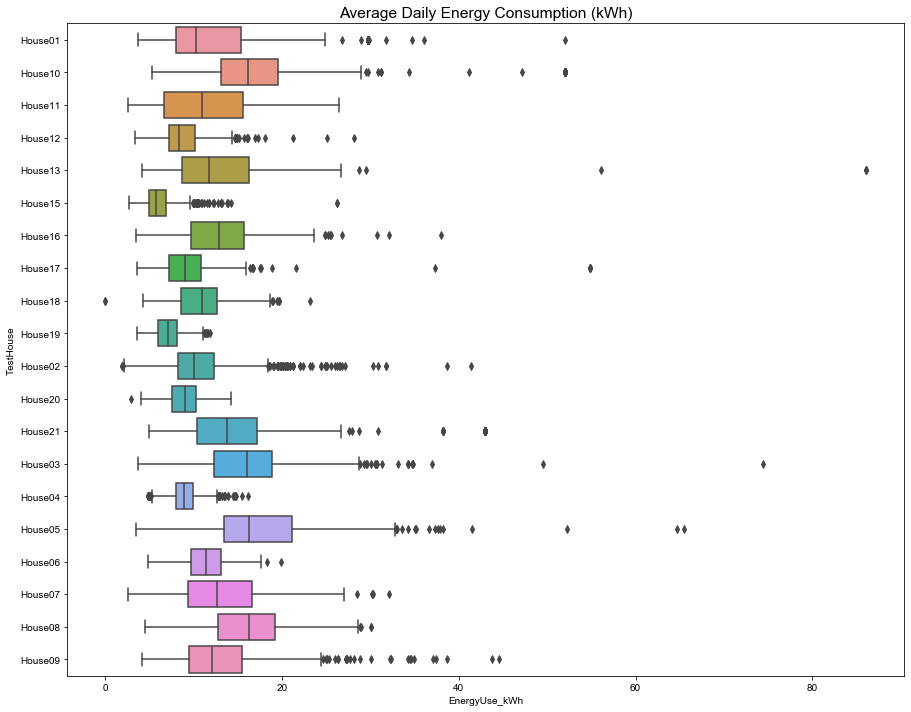

In [19]:
fig, ax = plt.subplots(figsize=(15,12))
#fig.set_size_inches(15,12)
sns.set(font_scale = 1.3)
plot_data = all_data[["AggregatePower_kW","EnergyUse_kWh", "TestHouse"]].dropna()
sns.boxplot(y="TestHouse", x="EnergyUse_kWh",
            #palette = "RdBu_r", #hue="smoker", 
            data = plot_data #all_data.reset_index()
           )
plt.title("Average Daily Energy Consumption (kWh)")
#sns.despine(offset=10, trim=True)

#### 2. What is the overal energy performance of the test buildings? 

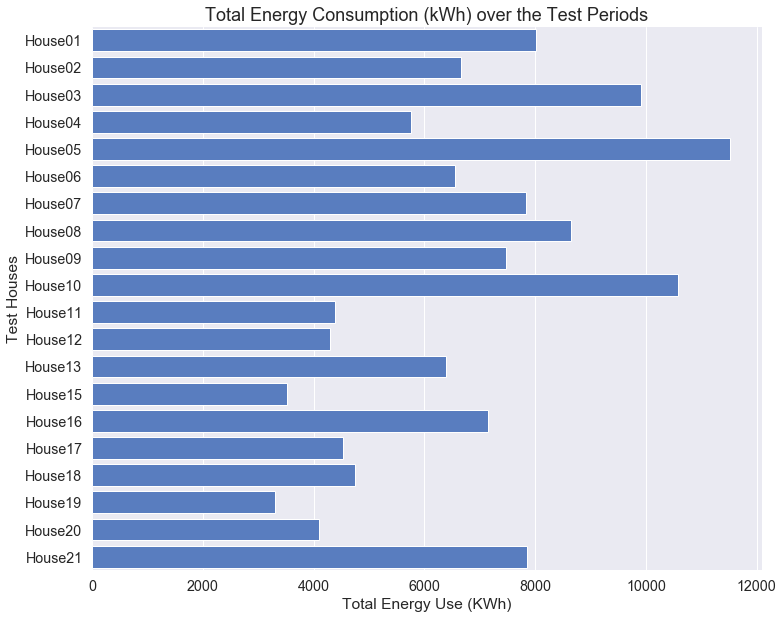

In [20]:
#sns.set_context('paper')
#fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize = (12,10))
#fig.set_size_inches(15,10)
sns.set(font_scale = 1.5)

plot_data = all_data_summaryCombined.reset_index()

sns.set_color_codes('muted')
#sns.set_color_codes('pastel')

sns.barplot(y = "TestHouse", x = "EnergyUse_kWh", data = plot_data,
            label = 'Type', color = 'b', edgecolor = 'w')

plt.title("Total Energy Consumption (kWh) over the Test Periods")
ax.set(xlabel = "Total Energy Use (KWh)", ylabel = "Test Houses")

sns.despine(left = True, bottom = True)
#sns.despine(offset=10, trim=True)
plt.show()

#### 3. Comparing the total Energy Consumption (kWh) by House Types and Bedroom Sizes

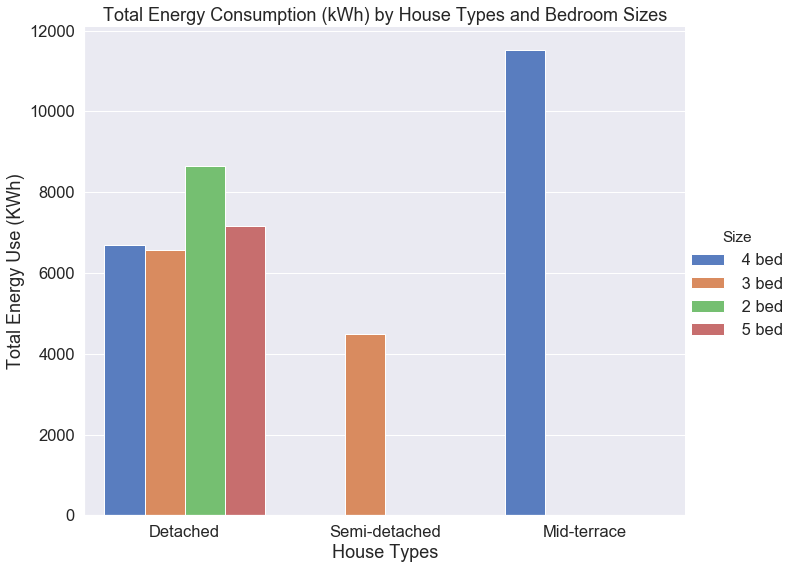

In [21]:
# Plot dataset
p_data = all_data_summaryCombined.reset_index()
sns.set(font_scale = 1.5)

# create plotType
g = sns.catplot(x = "Type", y = "EnergyUse_kWh",
                hue = "Size", data = p_data,
                height = 8, aspect = 1.25,
                kind = "bar", palette = "muted", 
                ci = None
               )
plt.title("Total Energy Consumption (kWh) by House Types and Bedroom Sizes")
g.set_ylabels("Total Energy Use (KWh)")
g.set_xlabels("House Types")
plt.show()

#### 4. Comparing the total Energy Consumption (kWh) by House Types and Occupancy 

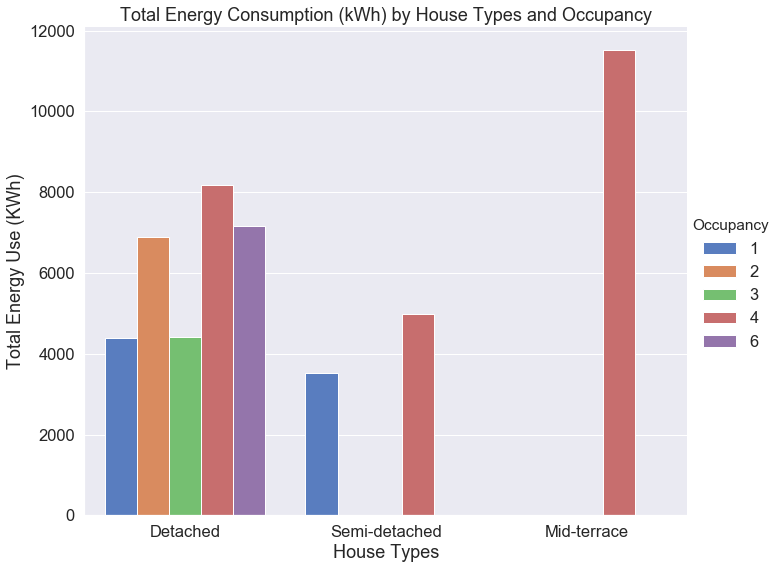

In [22]:
# Plot dataset
p_data = all_data_summaryCombined.reset_index()
sns.set(font_scale = 1.5)

# create plotType
g = sns.catplot(x = "Type", y = "EnergyUse_kWh",
                hue = "Occupancy", data = p_data,
                height = 8, aspect = 1.25,
                kind = "bar", palette = "muted", 
                ci = None
               )
plt.title("Total Energy Consumption (kWh) by House Types and Occupancy")
g.set_ylabels("Total Energy Use (KWh)")
g.set_xlabels("House Types")
plt.show()

#### 5. Comparing the total Energy Consumption (kWh) by House Types and Consturction Age Groups 

In [ ]:
# Plot dataset
p_data = all_data_summaryCombined.reset_index().dropna()
sns.set(font_scale = 1.5)

# create plotType
g = sns.catplot(x = "Type", y = "EnergyUse_kWh",
                hue = "AgeGroup", data = p_data,
                height = 8, aspect = 1.25,
                kind = "bar", palette = "muted", 
                ci = None
               )
plt.title("Total Energy Consumption (kWh) by House Types and Construction Age Groups")
g.set_ylabels("Total Energy Use (KWh)")
g.set_xlabels("House Types")
plt.show()


#### 6. Distribution of total energy across the test houses

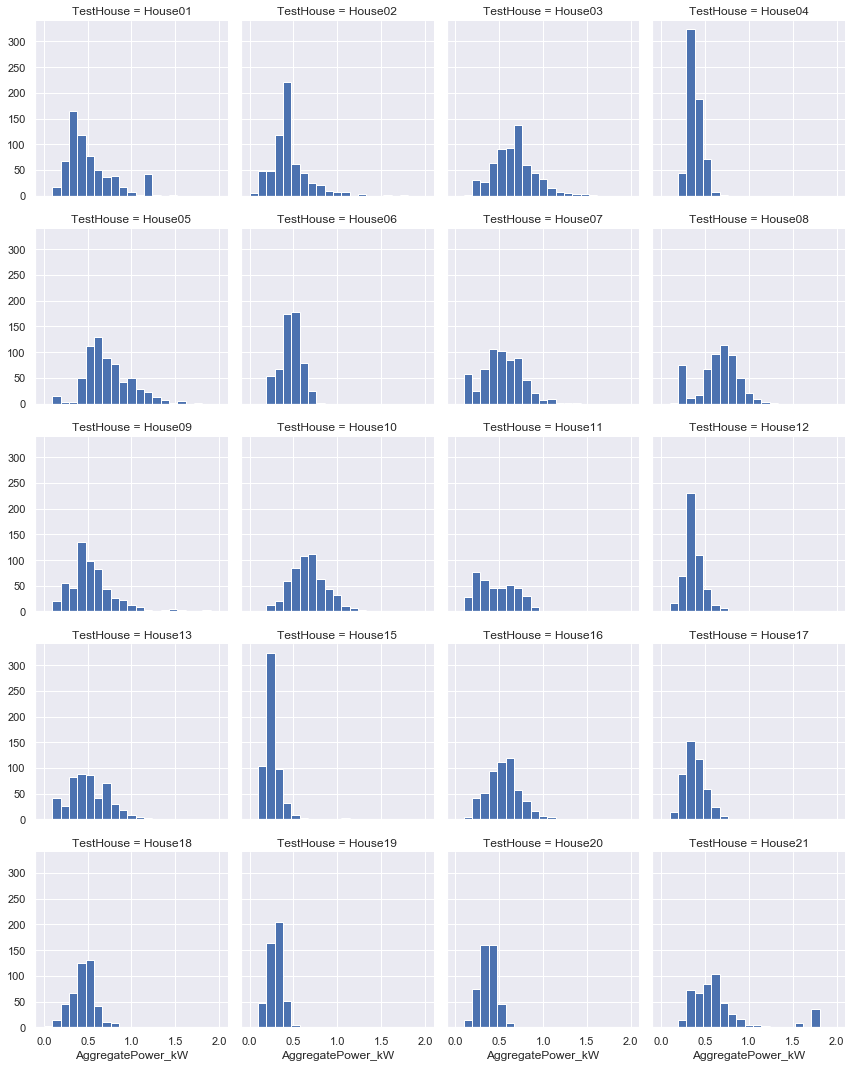

In [24]:
#sns.set(style = "ticks", color_codes = True)
#no_of_houses = all_data["TestHouse"].nunique()
sns.set(style="darkgrid")

p0 = all_data.reset_index().sort_values('TestHouse', ascending = True)
p1 = sns.FacetGrid(p0, col = "TestHouse", col_wrap = 4)
#p2 = p1.map(plt.plot, "Time", "AggregatePower_kW")
bins = np.linspace(0, 2.0, 22)

p2 = p1.map_dataframe(plt.hist, "AggregatePower_kW", 
                      bins = bins
                     )
    
#define date format
#date_form = mdates.DateFormatter("%b-%Y")
#ax.xaxis.set_major_formatter(date_form)
#plt.show()
